# Number of Parks in Neighborhoods
## By Jared Glickfield

I chose to find the best neighborhood based on the number of parks in it. During the past few months parks ahve been a place where I have asceped my house and gone outside. I think that they are very necessary for a  community and would be a good metric to go off of. 

In [10]:
# Import pandas for geojson manipulation
# Import geopandas in order to use geojson and geometry objects
# Import matplotlib to graph map
# Import warnings cause an annoying warning was popping up 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Get files from file tree
neighborhood = gpd.read_file("../Neighborhoods_.geojson")
parks = gpd.read_file("Pittsburgh_Parks.geojson")

In [12]:
# See where parks are located
parkNum = pd.DataFrame(neighborhood.objectid, columns=['objectid', 'parks'])
for index, n in neighborhood.iterrows():
    numOfParks = 0 
    for index, p in parks.iterrows():
        # Check each neighborhood and park for intersection
        if n.geometry.intersects(p.geometry):
            numOfParks += 1
    # If parks exist add num to new col in parkNum data frame
    parkNum.at[parkNum[parkNum['objectid'] == n.objectid].index.values[0], 'parks'] = numOfParks

# Place parks col into the neighborhood geojson to be used in map
neighborhood.insert(1, 'parks', parkNum.parks)

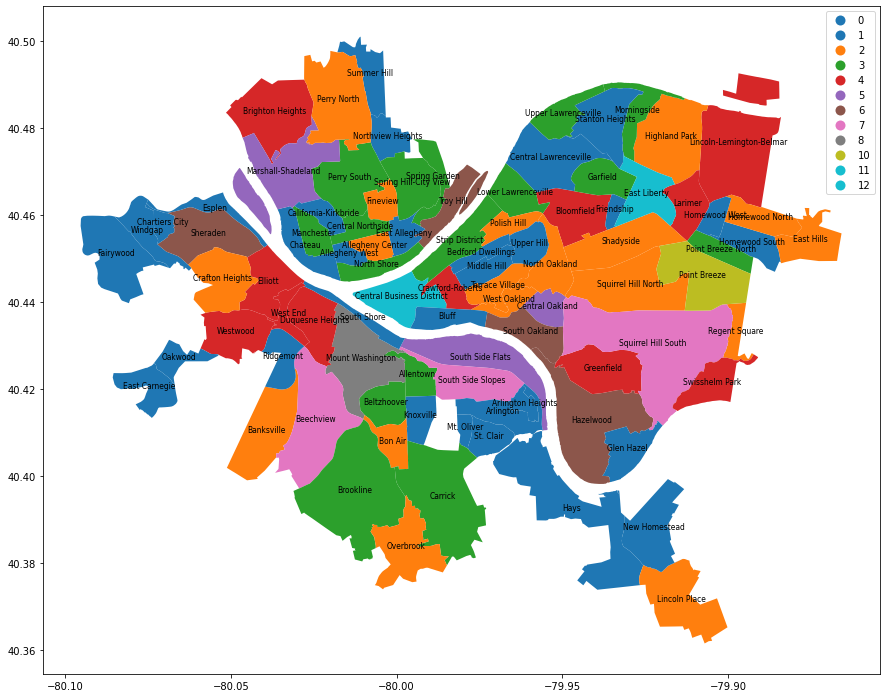

In [13]:
# Creat the plot and set its size
fig, ax = plt.subplots(figsize=(15, 15))

# Find the center of each neighborhood
neighborhood['center']= neighborhood.geometry.centroid

# Copy neighborhood so it doesn't confict when ploting
neighborhoodPts = neighborhood.copy()
# Make a new geometry for center of shape
neighborhoodPts.set_geometry("center", inplace = True)

# For each row set a name at a point
for x, y, label in zip(neighborhoodPts.geometry.x, neighborhoodPts.geometry.y, neighborhood.hood):
    plt.text(x, y, label, fontsize = 7.5, ha = 'center', weight = '525')
    
# Plot the map on ax with colors based off the number of parks
neighborhood.plot(column='parks', ax=ax, legend=True)

Based on my finding the **Central Buisness District** with 12 parks and **East Liberty** with 11 are the two best neighborhoods to be in. Most neighborhoods  had 3 or less parks. Going based of my metric the **Central Buisness District** is the best neighborhood.